In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("../data/FuelConsumption.csv")
cdf=df[['ENGINESIZE','CYLINDERS','CO2EMISSIONS','FUELCONSUMPTION_COMB']]

In [9]:
cdf.head(9)

,ENGINESIZE,CYLINDERS,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,2.0,4,196,8.5
1,2.4,4,221,9.6
2,1.5,4,136,5.9
3,3.5,6,255,11.1
4,3.5,6,244,10.6
5,3.5,6,230,10.0
6,3.5,6,232,10.1
7,3.7,6,255,11.1
8,3.7,6,267,11.6


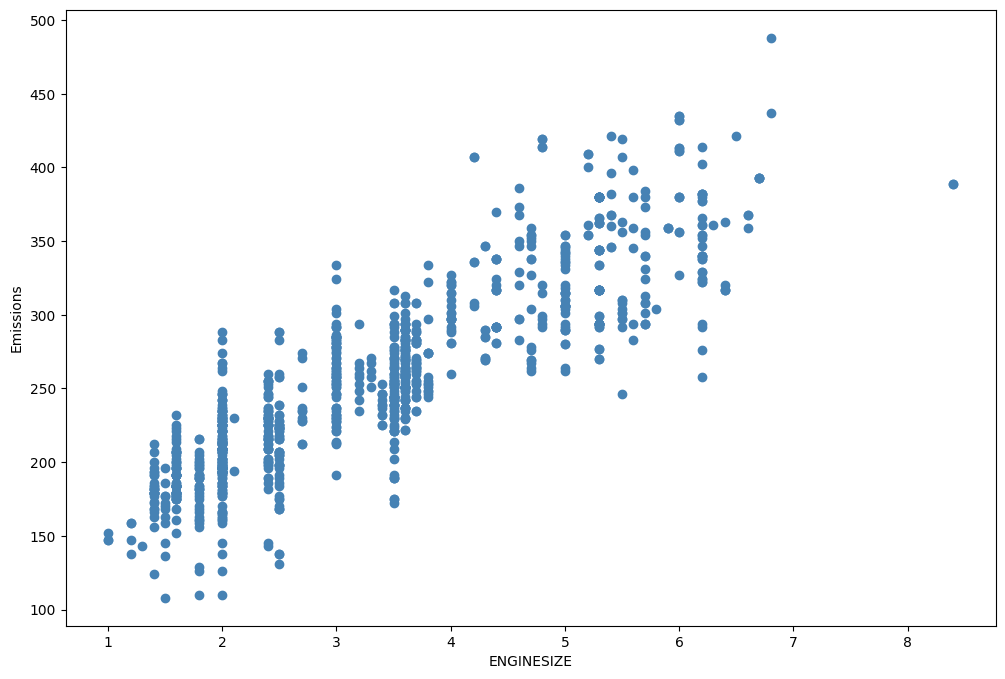

In [17]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="steelblue")
plt.xlabel("ENGINESIZE")
plt.ylabel("Emissions")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(df,test_size=0.2)

- In polynomial regression,the relationship between the independent variable x and the dependent variable y is modeled as  nth degree polynomial in x.
2nd degree:
y=b +
For Example,the original feature set has only one feature:ENGINESIZE
If we select the degree of the polynomial to be 2:
It generates 3 features:degree=0,degree=1,degree=2

In [20]:
from sklearn.preprocessing import PolynomialFeatures
train_x=np.asanyarray(train[["ENGINESIZE"]])
train_y=np.asanyarray(train[["CO2EMISSIONS"]])

test_x=np.asanyarray(train[["ENGINESIZE"]])

test_y=np.asanyarray(train[["CO2EMISSIONS"]])
poly=PolynomialFeatures(degree=2)

In [11]:
train_x_poly = poly.fit_transform(train_x)
print(train_x_poly)

[[ 1.    5.5  30.25]
 [ 1.    1.4   1.96]
 [ 1.    3.4  11.56]
 ...
 [ 1.    5.2  27.04]
 [ 1.    2.4   5.76]
 [ 1.    1.5   2.25]]


- Transformed data looks like feature sets of multiple linear regression analysis.
2nd degree quation  would be turn into:
y=
- Polynomial regression is a special case of linear regression ,with selection your features.


In [12]:
from sklearn import linear_model
clf=linear_model.LinearRegression()

In [14]:
train_y_=clf.fit(train_x_poly,train_y)

#The coefficients
print("Coefficients:",clf.coef_)
print("Intercept:" ,clf.intercept_)

Coefficients: [[ 0.         51.73145819 -1.69892775]]
Intercept: [105.58744534]


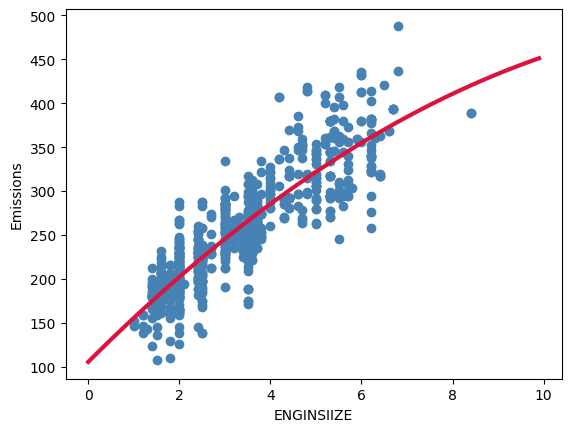

In [15]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS, color="steelblue")
XX=np.arange(0.0,10.0,0.1)
yy=clf.intercept_[0] + clf.coef_[0][1] * XX + clf.coef_[0][2] * np.power(XX,2)
plt.plot(XX,yy,"crimson",linewidth=3)
plt.xlabel("ENGINSIIZE")
plt.ylabel("Emissions")
plt.show()


In [18]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[105.58744534 110.74360188 115.86577987 120.9539793  126.00820018
 131.0284425  136.01470627 140.96699148 145.88529814 150.76962624
 155.61997578 160.43634677 165.21873921 169.96715309 174.68158842
 179.36204519 184.0085234  188.62102306 193.19954417 197.74408672
 202.25465072 206.73123616 211.17384304 215.58247137 219.95712115
 224.29779237 228.60448503 232.87719914 237.1159347  241.3206917
 245.49147014 249.62827003 253.73109137 257.79993415 261.83479837
 265.83568404 269.80259115 273.73551971 277.63446972 281.49944117
 285.33043406 289.1274484  292.89048418 296.61954141 300.31462009


# Evalution
- Mean Absolute Error (MAE)
- Mean Squared Error (SME)
- R2-Score

In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print(f"Mean Absolute Error (MAE): {np.mean(np.absolute(test_y_ - test_y)):.2f}")
print(f"Mean Squared Error (MSE): {np.mean((test_y_ - test_y) ** 2):.2f}")
print(f"R2-Score: {r2_score(test_y, test_y_):.2f}")

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelin tahmin ettiği değerler
predicted_y = clf.predict(train_x_poly)

# MAE hesapla
mae = mean_absolute_error(train_y, predicted_y)
print("MAE: ", mae)

mse = mean_squared_error(train_y, predicted_y)
print("MAE: ", mae)

rmse=np.sqrt(mean_squared_error(train_y, predicted_y))
print("RMSE: ", rmse)

r2=r2_score(train_y, predicted_y)
print("r²: ", r2)

MAE:  23.448512546735486
MAE:  23.448512546735486
RMSE:  30.71344998539643
r²:  0.7634515218996023


## Practice
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?